# Introduction to Optimizers

“Optimizers are algorithms that adjust the model’s parameters (weights and biases) to minimize the loss function.”

🚀 **Why do we need optimizers?**
- To minimize loss efficiently  
- To update weights using the gradient computed during backpropagation  
- To converge faster, avoid local minima/saddle points  

---

# 2. Gradient Descent Recap (Bridge)

Remind students:

General update rule:

$$
\theta = \theta - \alpha \cdot \nabla_\theta J(\theta)
$$

Where:  
- $\theta$: weights/biases  
- $\alpha$: learning rate  
- $\nabla_\theta J(\theta)$: gradient of loss w.r.t. parameters  

---

# Different Optimizers

- SGD with Momentum  
- Adagrad  
- RMSProp  
- Adam  


# Disadvantages of Basic Gradient Descent

- **Can overshoot** the minimum if learning rate is too large  
- **Needs careful learning rate tuning** — too small slows training, too large causes instability  
- **Can get stuck in local minima or saddle points**, slowing convergence  

---
# Exponentially Weighted Moving Average (EWMA)

The Exponentially Weighted Moving Average (EWMA) is a technique to smooth data by applying weights that decrease exponentially over time. It gives more importance to recent observations while not completely ignoring older data.

---

### Formula:

Given a series of values $\theta_t$, the EWMA at time $t$, denoted as $v_t$, is computed as:

$$
v_t = \beta v_{t-1} + (1 - \beta) \theta_t
$$

Where:  
- $v_t$ is the smoothed value at time $t$  
- $\theta_t$ is the current observation  
- $\beta$ is the smoothing factor ($0 < \beta < 1$), controlling how fast the weights decrease  
- $v_0$ is usually initialized as 0 or $\theta_0$

---

### Intuition:

- A higher $\beta$ (e.g., 0.9) means **more smoothing**, slower changes  
- A lower $\beta$ means the average reacts more quickly to recent changes  

---

### Example:

Suppose we have a sequence of daily temperatures:  
$$
\theta = [30, 32, 31, 35, 33]
$$

Using $\beta = 0.8$ and initializing $v_0 = 30$, the EWMA values are:

| Time ($t$) | $\theta_t$ | $v_t = 0.8 \times v_{t-1} + 0.2 \times \theta_t$ |
|------------|------------|--------------------------------------------------|
| 0          | 30         | 30 (initial value)                               |
| 1          | 32         | $0.8 \times 30 + 0.2 \times 32 = 30.4$          |
| 2          | 31         | $0.8 \times 30.4 + 0.2 \times 31 = 30.52$       |
| 3          | 35         | $0.8 \times 30.52 + 0.2 \times 35 = 31.62$      |
| 4          | 33         | $0.8 \times 31.62 + 0.2 \times 33 = 31.90$      |

Notice how $v_t$ smooths out the fluctuations, giving more weight to recent days.

---



# What is SGD with Momentum?

SGD with Momentum is an extension of Stochastic Gradient Descent that helps accelerate training and stabilize updates by adding a “velocity” term. Instead of just moving in the direction of the current gradient, it accumulates a fraction of the previous update to build momentum.

---

### Formulas:

Velocity update:  
$$
v_t = \beta v_{t-1} + (1 - \beta) \frac{\partial L}{\partial w_t}
$$

Parameter (weight) update:  
$$
w_{t+1} = w_t - \alpha v_t
$$

Where:  
- $v_t$: velocity (momentum term) at time $t$  
- $\beta$: momentum coefficient (usually around 0.9)  
- $\alpha$: learning rate  
- $\frac{\partial L}{\partial w_t}$: gradient of loss with respect to weight at time $t$  

---

### Intuition:

- Momentum **smooths out oscillations** by averaging gradients over time  
- Helps the optimizer **accelerate in relevant directions** and **dampens oscillations** in others  
- Leads to **faster and more stable convergence**


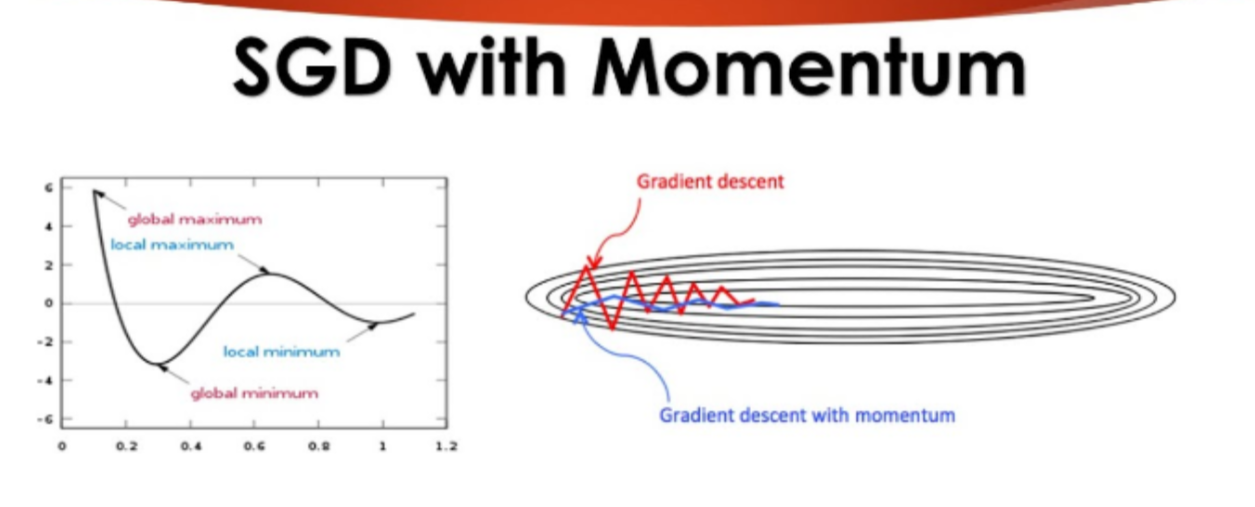

# AdaGrad (Adaptive Gradient Algorithm)

AdaGrad is an adaptive learning rate optimization algorithm designed to improve upon standard gradient descent by adjusting the learning rate individually for each parameter based on past gradients. It is especially effective for dealing with sparse data and features.


---

## How AdaGrad Works

At each time step $t$, for each parameter $w$:

1. Accumulate squared gradients:

$$
G_t = G_{t-1} + \left(\frac{\partial L}{\partial w_t}\right)^2
$$

Where:  
- $G_t$ is the sum of squares of gradients up to time $t$  
- $\frac{\partial L}{\partial w_t}$ is the gradient of the loss w.r.t. parameter $w$ at step $t$

2. Update the parameter with an adaptive learning rate:

$$
w_{t+1} = w_t - \frac{\alpha}{\sqrt{G_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t}
$$

Where:  
- $\alpha$ is the initial learning rate  
- $\epsilon$ is a small constant (e.g., $10^{-8}$) to avoid division by zero

---

## Intuition:

- If a parameter has had large gradients in the past (large $G_t$), its effective learning rate decreases, leading to smaller updates  
- Conversely, parameters with small or infrequent gradients get relatively larger updates  
- This adaptive scaling helps with sparse data (e.g., NLP or recommendation systems) where some features appear rarely

---

## Advantages:

- Automatically adapts learning rates for each parameter  
- Works well with sparse data and features  
- No need to manually tune learning rates for each parameter

---

## Disadvantages:

- The accumulated squared gradients $G_t$ keep growing, causing the effective learning rate to shrink and eventually become very small  
- This leads to the algorithm **stalling and stopping learning prematurely**  
- Less effective for non-sparse data or longer training periods

---



# RMSProp (Root Mean Square Propagation)

RMSProp is an adaptive learning rate optimization algorithm designed to improve upon AdaGrad by fixing its main problem: **the continually decreasing learning rate**.

It achieves this by using an **Exponential Weighted Moving Average (EWMA)** of squared gradients instead of accumulating all past squared gradients. RMSProp is especially well-suited for non-stationary and noisy problems, such as training Recurrent Neural Networks (RNNs).

---

## Key Idea:

- Maintain a **moving average** of the squared gradients  
- Divide the learning rate by the **root mean square** of this average  
- Helps keep the learning rate **adaptive** and **bounded**, preventing it from shrinking too much like in AdaGrad

---

## RMSProp Update Equations

1. **Update the running average of squared gradients**:

$$
G_t = \beta G_{t-1} + (1 - \beta) \left( \frac{\partial L}{\partial w_t} \right)^2
$$

2. **Update the parameters**:

$$
w_{t+1} = w_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t}
$$

Where:  
- $G_t$ is the exponentially weighted moving average of squared gradients  
- $\beta$ is the decay rate (commonly around 0.9)  
- $\eta$ is the learning rate  
- $\epsilon$ is a small constant (e.g., $10^{-8}$) to prevent division by zero  
- $\frac{\partial L}{\partial w_t}$ is the gradient of the loss w.r.t. parameter $w$ at time $t$

---

## Intuition:

- Recent gradients matter more due to EWMA  
- Learning rate is **scaled down** when gradients are consistently large  
- Learning rate stays **stable** over time — doesn't vanish like in AdaGrad  

---

## Advantages:

- Adapts learning rates for each parameter  
- Prevents learning rate from shrinking to zero (unlike AdaGrad)  
- Effective for training RNNs and deep networks

---

## Disadvantages:

- No momentum  
- Sensitive to hyperparameters like $\beta$ and $\eta$

---

## RMSProp in PyTorch

```python
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)


# Adam Optimizer

---

## 1. Introduction to Adam Optimizer

- **Adam** stands for **Adaptive Moment Estimation**.
- Combines the advantages of **Momentum** (like SGD with Momentum) and **RMSProp**:
  - Uses running averages of both the **gradients** and the **squared gradients**.
- Works well for sparse gradients and noisy problems.
- Adaptively adjusts learning rates for each parameter.

---

## 2. Motivation: Why Adam?

- SGD with Momentum helps accelerate gradients in consistent directions.
- RMSProp adapts learning rates based on recent gradient magnitudes.
- Adam merges these concepts to get:
  - Adaptive learning rates per parameter like RMSProp.
  - Momentum-like behavior by considering first moment (mean) of gradients.
- This helps Adam converge faster and more reliably in many cases.

---

## 3. Adam Algorithm — Step by Step

Let’s define:

- \( g_t \): Gradient at time step \( t \)
- \( m_t \): Exponential moving average of gradients (first moment estimate)
- \( v_t \): Exponential moving average of squared gradients (second moment estimate)
- \( \beta_1, \beta_2 \): Hyperparameters controlling decay rates of moving averages
- \( \epsilon \): Small constant to avoid division by zero
- \( \alpha \): Learning rate

---

### Step 1: Initialize moments

$$
m_0 = 0, \quad v_0 = 0
$$

---

### Step 2: Update biased first moment estimate

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$

- \( m_t \) captures the mean (momentum-like) of the gradients.

---

### Step 3: Update biased second moment estimate

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

- \( v_t \) captures the uncentered variance (magnitude) of gradients.

---

## 4. Explanation of Hyperparameters

- $\alpha$ (learning rate): typically 0.001 by default.  
- $\beta_1$ (decay rate for first moment): commonly 0.9.  
- $\beta_2$ (decay rate for second moment): commonly 0.999.  
- $\epsilon$: a small value (e.g., $10^{-8}$) to prevent division by zero.

---

### Step 5: Parameter update

$$
\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

---

## 4. Explanation of Hyperparameters

- \( \alpha \) (learning rate): typically 0.001 by default.
- \( \beta_1 \) (decay rate for first moment): commonly 0.9.
- \( \beta_2 \) (decay rate for second moment): commonly 0.999.
- \( \epsilon \): a small value (e.g., \(10^{-8}\)) to prevent division by zero.

---
## 5. Advantages of Adam

- Works well with sparse gradients (NLP, computer vision).
- Requires little tuning; works well with default hyperparameters.
- Combines momentum and adaptive learning rates for fast convergence.
- Robust to noisy or non-stationary objectives.

---

## 6. When to Use Adam?

- Generally a good default optimizer.
- Great for problems with sparse gradients or noisy data.
- Used widely in training large neural networks.
